# House Price Prediction (Multivariable Linear Regression)

This project aims to predict house prices using a multivariate linear regression model. Instead of using just one feature (like square footage), this version leverages multiple realistic features to build a more accurate and practical predictive model. This is an ideal starter project to showcase foundational skills in machine learning and regression analysis.

## Dataset (Synthetic)
- The data is synthetically generated using NumPy to simulate real-world housing data.

- Features used:

    SquareFeet: Size of the house

    Bedrooms: Number of bedrooms

    Bathrooms: Number of bathrooms

    LocationScore: Rating of the location (0–10 scale)

    Age: Age of the house in years

- Target variable:

    Price: House price calculated using a linear combination of features and random noise.

In [11]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Synthetic data
np.random.seed(42)
num_samples = 200

square_feet = np.random.normal(2000, 500, num_samples).astype(int)
num_bedrooms = np.random.randint(2, 6, num_samples)
num_bathrooms = np.random.randint(1, 4, num_samples)
location_score = np.random.uniform(5, 10, num_samples)
age_of_house = np.random.randint(0, 30, num_samples)

In [13]:
# Generate prices using a linear combination + some noise
price = (
    square_feet * 150 +
    num_bedrooms * 10000 +
    num_bathrooms * 7000 +
    location_score * 10000 -
    age_of_house * 2000 +
    np.random.normal(0, 20000, num_samples)  # noise
).astype(int)

In [14]:
# Create DataFrame
data = pd.DataFrame({
    'SquareFeet': square_feet,
    'Bedrooms': num_bedrooms,
    'Bathrooms': num_bathrooms,
    'LocationScore': location_score,
    'Age': age_of_house,
    'Price': price
})

In [15]:
# Visualize
print(data.head())

   SquareFeet  Bedrooms  Bathrooms  LocationScore  Age   Price
0        2248         3          1       9.871974   10  484783
1        1930         3          3       9.931054    3  423586
2        2323         2          1       8.490809   12  416565
3        2761         5          1       7.680482   10  525439
4        1882         2          2       6.547638    2  378890


In [16]:
# Correlation matrix
print("\nCorrelation Matrix:\n", data.corr())


Correlation Matrix:
                SquareFeet  Bedrooms  Bathrooms  LocationScore       Age  \
SquareFeet       1.000000 -0.044357  -0.110900      -0.047630 -0.022614   
Bedrooms        -0.044357  1.000000  -0.082264       0.055316 -0.067627   
Bathrooms       -0.110900 -0.082264   1.000000       0.028413 -0.080891   
LocationScore   -0.047630  0.055316   0.028413       1.000000 -0.098604   
Age             -0.022614 -0.067627  -0.080891      -0.098604  1.000000   
Price            0.898433  0.137547  -0.001794       0.171207 -0.266131   

                  Price  
SquareFeet     0.898433  
Bedrooms       0.137547  
Bathrooms     -0.001794  
LocationScore  0.171207  
Age           -0.266131  
Price          1.000000  


In [17]:
# Train/test split
X = data[['SquareFeet', 'Bedrooms', 'Bathrooms', 'LocationScore', 'Age']]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [19]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

print(f"\nIntercept: {model.intercept_:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Coefficients:
SquareFeet: 154.32
Bedrooms: 10783.91
Bathrooms: 8336.48
LocationScore: 9832.99
Age: -1852.27

Intercept: -14073.58
Mean Squared Error: 346994272.20
R² Score: 0.93


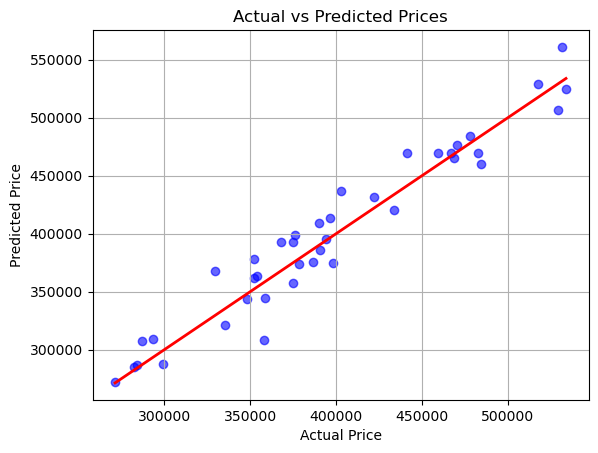

In [20]:
# Visualize predictions
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()